In [1]:
# Install and load packages
library(ggplot2)
install.packages("gridExtra", repos="http://cran.rstudio.com/")
library(gridExtra)
library(scales)


The downloaded source packages are in
	‘/private/var/folders/v9/6_3q92b512q408c7y9_mw55h0000gn/T/RtmpQv1JS7/downloaded_packages’


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
### inputting the streaming dataframe ###
data <- read.table("~/git/ep-streaming/output/streaming/2016-06-08-full-thru-diginorm/parsed.times", header = F, sep = " ")
names(data) <- c("Steps", "Event", "Stamp")
data$Steps <- as.factor(data$Steps) #converting values into factors
data$Event <- as.factor(data$Event)
data$Stamp <- as.numeric(data$Stamp)

streamingsteps <- length(levels(data$Steps)) # handy variable for later

In [7]:
#creating data2 (type==matrix) with 'distributions'
data2 <- data.frame(matrix(NA, nrow = (streamingsteps)*6, ncol = 3, dimnames = list(NULL,c('Steps','Time','Method'))))
data2$Steps <- c(rep(levels(data$Steps), each=6))
data2$Method <- c(rep('Streaming', streamingsteps*6))


for (each in levels(data$Steps)) {
  indy1 <- which(data$Steps==each & data$Event=='START')
  indy2 <- which(data$Steps==each & data$Event=='DONE')
  data2[which(data2$Steps==each & data2$Method=='Streaming'),2] <- c(rep(data[indy1,3],3),rep(data[indy2,3],3)) 
                                                                  #repeats start time and end time 5x
                                                                  # each in the correspoding matrix rows
}

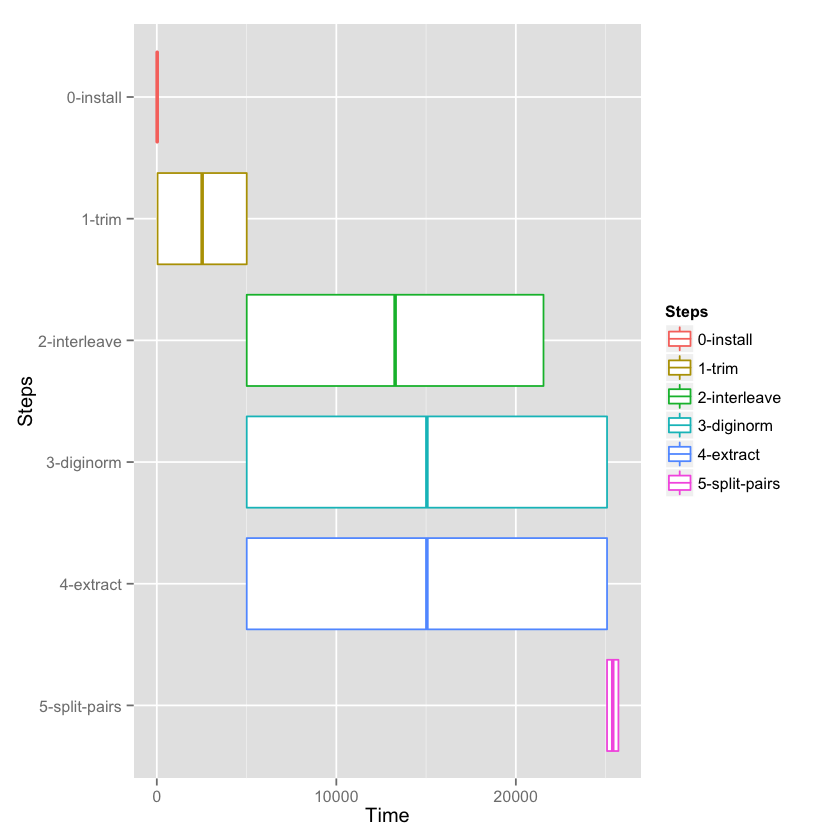

In [8]:
data2$Steps <- as.factor(data2$Steps) # designate pipeline steps as factors
data2$Time <- as.numeric(data2$Time)

### build the plot (coloring by step)
plot <- ggplot(data2, aes(x=Steps, y=Time, color=Steps)) 
plot <- plot + geom_boxplot()                              # plot with steps on the x axis 
                                                          # because coords will be flipped after
plot <- plot + scale_x_discrete(limits = rev(levels(data2$Steps))) # custom order the steps
plot <- plot + coord_flip()  # flip the coordinates
 
plot